$$Diego \space Castillo \space Reyes$$

<h1 align="center">QFT para n qubits</h1>

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ask for number of qubits and the state to initialize
qubits = n = int(input("Enter the number of qubits: "))

# define the device
dev = qml.device("default.qubit", wires=qubits)

In [3]:
# define the circuit
@qml.qnode(dev)
def circuit(qubits, n):
    # initializze the state randomly
    np.random.seed(5)
    random_state = np.random.randint(0, 2**qubits)
    binary_state = format(random_state, f'0{qubits}b')
    print(f"Initializing state |{binary_state}>")
    for i, bit in enumerate(binary_state):
        if bit == '1':
            qml.PauliX(i)

    # QFT implementation
    for i in range(n):
        if n == 0:
            break
        n -= 1
        qml.Hadamard(n)
        for j in range(n):
            qml.ControlledPhaseShift(np.pi / 2**(n - j), [j, n])

    # swap qubits
    for i in range(qubits // 2):
        qml.SWAP([i, qubits - 1 - i])

    return qml.state()

Initializing state |0011>


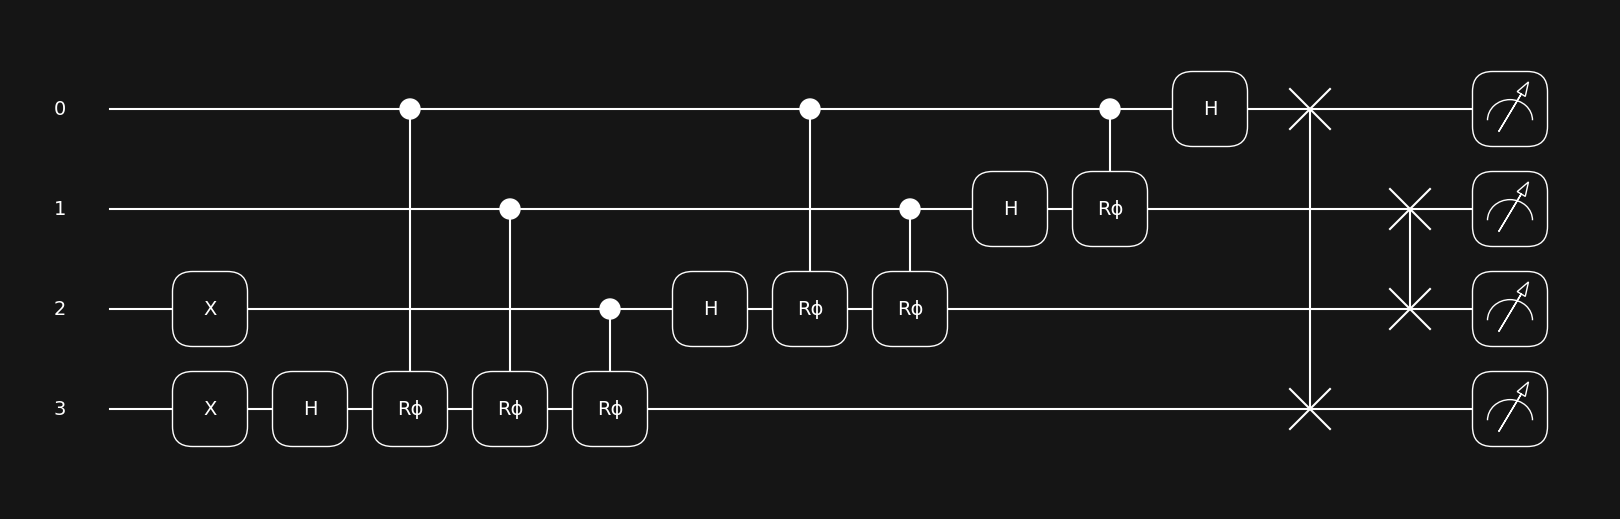

In [4]:
# draw the circuit
qml.drawer.use_style("black_white_dark")
fig, ax = qml.draw_mpl(circuit)(qubits, n)
plt.show()

In [5]:
# print the statevector
print(f"Vector de estado: {circuit(qubits, n).round(3)}")

Initializing state |0011>
Vector de estado: [ 0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j   -0.25+0.j   -0.25+0.j
 -0.25+0.j   -0.25+0.j   -0.  -0.25j -0.  -0.25j -0.  -0.25j -0.  -0.25j
  0.  +0.25j  0.  +0.25j  0.  +0.25j  0.  +0.25j]
